In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re

In [2]:
df=pd.read_csv('ModernistLibraries.csv')

# Describe:

We got a csv file about Modernist Libraries from our data holder.The general type of the data is tabular data,and there are many text information in it.


In [3]:
row=df.shape[0]
column=df.shape[1]
print('Rows:',row)
print('Columns:',column)

Rows: 23351
Columns: 11


In [4]:
df.head()

,BookOwnerVIAFID,BookOwnerName,WorkID,BookID,BookTitle,BookAuthorName,BookPubDetails,BookPubDate,BookNotes,BookCollection,InformationSource
0,97006051,Ernest Hemingway,4650949,25197870,Sinistro and celebration: 19 poems,A.E.T.,1956,1956,NaN,Finca Vigia.,manual entry
1,97006051,Ernest Hemingway,4650967,25198046,Tauromaquia y taurogogÕa: Algunos concertos bà...,R. Abarquero Durango,"Madrid: Torroba, 1959.",1959,NaN,Finca Vigia.,manual entry
2,97006051,Ernest Hemingway,429839,25198087,We pointed them North; recollections of a cowp...,Edward Charles Abbott,"Norman: University of Oklahoma Press [1955, c1...",1955,NaN,Finca Vigia.,Library of Congress
3,97006051,Ernest Hemingway,429839,25198220,We pointed them north; recollections of a cowp...,Edward Charles Abbott,"New York: Farrar & Rinehart, inc. [c1939]",1939,NaN,Finca Vigia.,Library of Congress
4,97006051,Ernest Hemingway,7785885,25198292,Japan unmasked,Hallett Edward Abend,"New York: I. Washburn, Inc., 1941.",1941,NaN,Finca Vigia.,Library of Congress


In [5]:
df.columns

Index(['BookOwnerVIAFID', 'BookOwnerName', 'WorkID', 'BookID', 'BookTitle',
       'BookAuthorName', ' BookPubDetails', ' BookPubDate', ' BookNotes',
       ' BookCollection', 'InformationSource'],
      dtype='object')

I want to see all the names of columns and check if there is any problems in it. Actually,some column names has a space before it,which would affect my anlaysis later,so I cleaned space.

In [6]:
remove_space_columns=[]
for i in df.columns:
    remove_space_columns.append(i.replace(' ',''))
df.columns=remove_space_columns
print(df.columns)

Index(['BookOwnerVIAFID', 'BookOwnerName', 'WorkID', 'BookID', 'BookTitle',
       'BookAuthorName', 'BookPubDetails', 'BookPubDate', 'BookNotes',
       'BookCollection', 'InformationSource'],
      dtype='object')


Summary statistics about the data:

1) I want to see the number of bookowners and know who they are.

In [7]:
bookownernumber=df.groupby('BookOwnerName')
print('There are',len(bookownernumber),'book owners in the dataframe.')
print('They are:')
arr=df.BookOwnerName.unique()
for i in range(len(arr)):
    print('--',arr[i])

There are 13 book owners in the dataframe.
They are:
-- Ernest Hemingway
-- James Joyce
-- W.H. Auden
-- Ezra Pound
-- F. Scott Fitzgerald
-- e.e. cummings
-- W.B. Yeats
-- Flannery O'Connor
-- Virginia Woolf
-- Gertrude Stein
-- Edith Sitwell
-- Edna St. Vincent Millay
-- Langston Hughes


2) I want to know the number of the books each owner has,and know who has the largest number of books.

In [8]:
booknumber=df['BookOwnerName'].value_counts()
owner=pd.Series(booknumber.index)

arr=[]
for i in range(len(booknumber)):
    arr.append([])
    arr[i].append(owner[i])
    arr[i].append(booknumber[i])

df1=pd.DataFrame(arr,columns=['bookownername','booknumber'])
df1

,bookownername,booknumber
0,Ernest Hemingway,7408
1,Virginia Woolf,5075
2,e.e. cummings,2604
3,W.B. Yeats,2284
4,James Joyce,1197
5,Edna St. Vincent Millay,1183
6,Gertrude Stein,958
7,Edith Sitwell,857
8,Ezra Pound,712
9,W.H. Auden,329


In [9]:
maxbooknumber=df1['booknumber'].max()
name=booknumber.idxmax()
print(name,' has the largest number of book,the number is', maxbooknumber)

Ernest Hemingway  has the largest number of book,the number is 7408


3) I want to know the number of bookauthors and who's books are the most popular in bookowners library.

In [10]:
bookauthornumber=df.groupby('BookAuthorName')
print('The number of the book author is: ',len(bookauthornumber))

The number of the book author is:  12728


In [11]:
cleanbookauthorname=df[df['BookAuthorName']!='[N.auth]']
a=cleanbookauthorname['BookAuthorName'].value_counts()
maxindex=a.idxmax()
print('The books written by',maxindex,'''are the most popular in bookowner's libraries.''','And the total number is ',a.max())

The books written by W.B. Yeats   are the most popular in bookowner's libraries. And the total number is  176


4) I want to check the book information source and see which one is the top one information source.

In [12]:
information_source_n=df['InformationSource'].value_counts()
information_source=pd.Series(information_source_n.index)

arr=[]
for i in range(len(information_source_n)):
    arr.append([])
    arr[i].append(information_source[i])
    arr[i].append(information_source_n[i])

df2=pd.DataFrame(arr,columns=['information_source','number'])
df2.head(20)

,information_source,number
0,Library of Congress,5548
1,manual entry,1160
2,Yale University,159
3,amazon.com,120
4,British Library (powered by Talis),65
5,"University of California, CDL",54
6,ILCSO (Illinois Libraries),47
7,SUDOC,40
8,Columbia (CLIO),31
9,University of Michigan,30


In [13]:
most=information_source_n.idxmax()
print(most,'is the top one information source and ',information_source_n.max(),'books information comes from there.')

Library of Congress is the top one information source and  5548 books information comes from there.


5) I want to see the top 10 books in the dataset from the booktitle

In [14]:
BookTitle_information=df['BookTitle'].value_counts().head(10).to_frame()
BookTitle_information

,BookTitle
Poems,128
Selected poems,36
Collected poems,22
Ulysses,16
Poem,16
Collected Poems,12
Plays,10
Doy fe... un a_o de actuaciÑn en la Espa_a nacionalista,10
Selected Poems,9
Anna Karenina,8


6) I want to explore something related to the BookPubDate.First,I cleaned the date because of the inconsistency of the format.

In [15]:
index_arr=[]
for index,value in enumerate(df['BookPubDate']):
    index_arr.append(False)
    if str(value).isdigit():
        if len(value)==4:
            if int(value)<2017 and int(value)>1000:
                index_arr[index]=True
        else:
            pass
    else:
        pass

cleaned_df=df[index_arr]
cleaned_df.head()

,BookOwnerVIAFID,BookOwnerName,WorkID,BookID,BookTitle,BookAuthorName,BookPubDetails,BookPubDate,BookNotes,BookCollection,InformationSource
0,97006051,Ernest Hemingway,4650949,25197870,Sinistro and celebration: 19 poems,A.E.T.,1956,1956,NaN,Finca Vigia.,manual entry
1,97006051,Ernest Hemingway,4650967,25198046,Tauromaquia y taurogogÕa: Algunos concertos bà...,R. Abarquero Durango,"Madrid: Torroba, 1959.",1959,NaN,Finca Vigia.,manual entry
2,97006051,Ernest Hemingway,429839,25198087,We pointed them North; recollections of a cowp...,Edward Charles Abbott,"Norman: University of Oklahoma Press [1955, c1...",1955,NaN,Finca Vigia.,Library of Congress
3,97006051,Ernest Hemingway,429839,25198220,We pointed them north; recollections of a cowp...,Edward Charles Abbott,"New York: Farrar & Rinehart, inc. [c1939]",1939,NaN,Finca Vigia.,Library of Congress
4,97006051,Ernest Hemingway,7785885,25198292,Japan unmasked,Hallett Edward Abend,"New York: I. Washburn, Inc., 1941.",1941,NaN,Finca Vigia.,Library of Congress


In [16]:
cleaned_df['BookPubDate']=cleaned_df['BookPubDate'].astype(int)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
a=cleaned_df['BookPubDate'].min()
b=cleaned_df['BookPubDate'].max()
print('The book publish year in this dataset ranged from ',a,'to',b)

The book publish year in this dataset ranged from  1516 to 2007


In [18]:
ave=cleaned_df['BookPubDate'].mean()
print('The average book publish year in this dataset is',int(ave))

The average book publish year in this dataset is 1928


7) I want to check the top 15 locations in the book publish details:

In [19]:
BookPubDetails_n=df['BookPubDetails']

arr=[]
for i in range(len(BookPubDetails_n)):
    arr.append([])
    if str(BookPubDetails_n[i]).find(':')>0:
        a=str(BookPubDetails_n[i]).split(':')[:1]
        b=a[0].strip()
        arr[i].append(b)

df2=pd.DataFrame(arr,columns=['BookPubDetails'])

BookPubDetails_n=df2['BookPubDetails'].value_counts()
BookPubDetails=pd.Series(BookPubDetails_n.index)

arr=[]
for i in range(len(BookPubDetails_n)):
    arr.append([])
    arr[i].append(BookPubDetails[i])
    arr[i].append(BookPubDetails_n[i])

df3=pd.DataFrame(arr,columns=['BookPublocation','number'])
df4=df3.head(15)
df4

,BookPublocation,number
0,London,4493
1,New York,2140
2,Paris,864
3,London ; New York,435
4,Boston,218
5,Leipzig,194
6,Oxford,191
7,Cambridge,100
8,Milano,95
9,"Garden City, N.Y.",92


8) I want to see how many WorkIDs are repeated in the dataset:the same WorkID means the same book,but the BookID is always unique.

In [20]:
WorkID=Counter(df['WorkID'])
print('The total number of WorkID in the dataset is',len(WorkID))
count=0
for k,v in WorkID.items():
    if v!=1:
        count=count+1
    else:
        pass
print('There are',count,'repeated WorkID.')

The total number of WorkID in the dataset is 19889
There are 2218 repeated WorkID.


9) How does the data relate to the questions that the data owner has discussed with you?

# Explore

1) Explore the relationship between the bookowner and the number of books they owned:

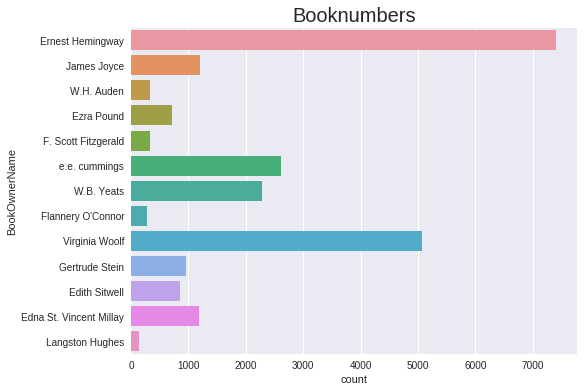

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(y='BookOwnerName', data=df)
plt.title('Booknumbers',size=20)
plt.show()

2) use pie chart to show the proportation of booknumbers in terms of each bookowners.

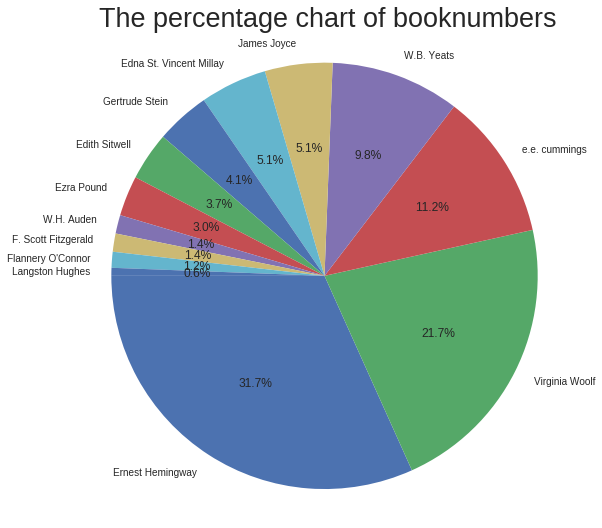

In [27]:
booknumber=df['BookOwnerName'].value_counts()
owner=pd.Series(booknumber.index)

arr=[]
for i in range(len(booknumber)):
    arr.append([])
    arr[i].append(owner[i])
    arr[i].append(booknumber[i])

df1=pd.DataFrame(arr,columns=['bookownername','booknumber'])

plt.pie(
    df1['booknumber'],
    labels=df1['bookownername'],
    shadow=False,  
    startangle=180, 
    autopct='%1.1f%%',
    )

plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(7.5,7.5)
plt.title('The percentage chart of booknumbers',size=27)
plt.tight_layout()
plt.show()

3) Explore the distribution of BookPubDate in the dataset

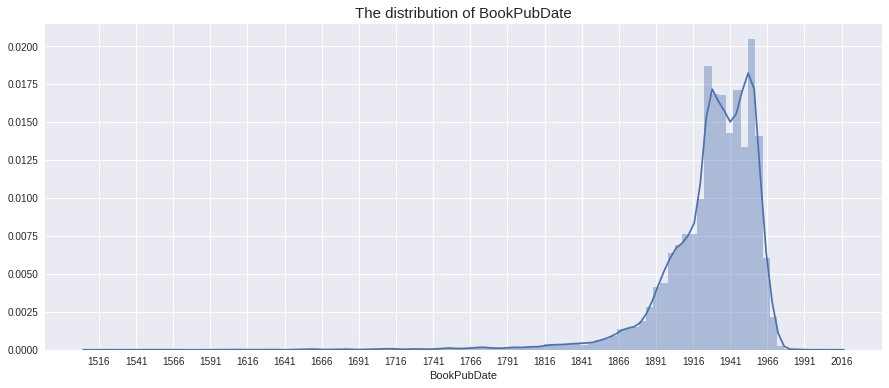

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
plt.xticks(np.arange(min(cleaned_df['BookPubDate']), max(cleaned_df['BookPubDate'])+25, 25))
sns.distplot(cleaned_df['BookPubDate'],bins=100)
plt.title('The distribution of BookPubDate',size=15)
plt.show()

4) Explore the relationship between the BookOwner and the BookPubDate(average punlish year)

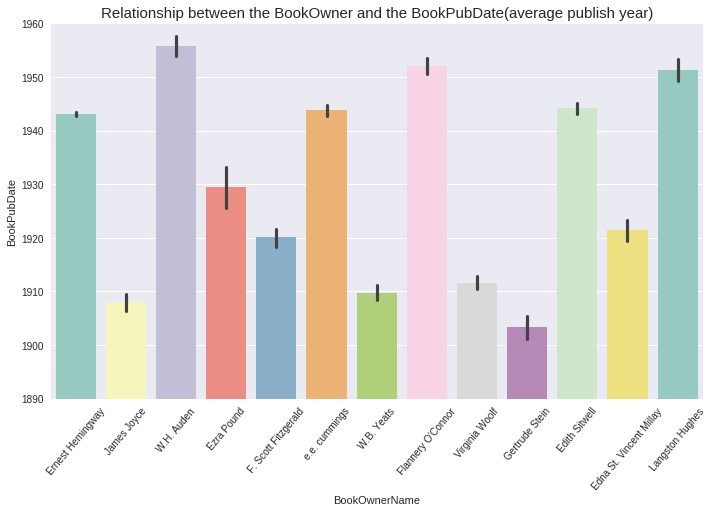

In [24]:
sns.factorplot(x='BookOwnerName',y='BookPubDate',data=cleaned_df,kind='bar',size=6,aspect=1.7,palette ='Set3')
plt.xticks(rotation=50)
plt.title('Relationship between the BookOwner and the BookPubDate(average publish year)',size=15)
plt.ylim(1890,1960)
plt.show()

5) Explore the relationship between the BookOwner and the BookPubDate

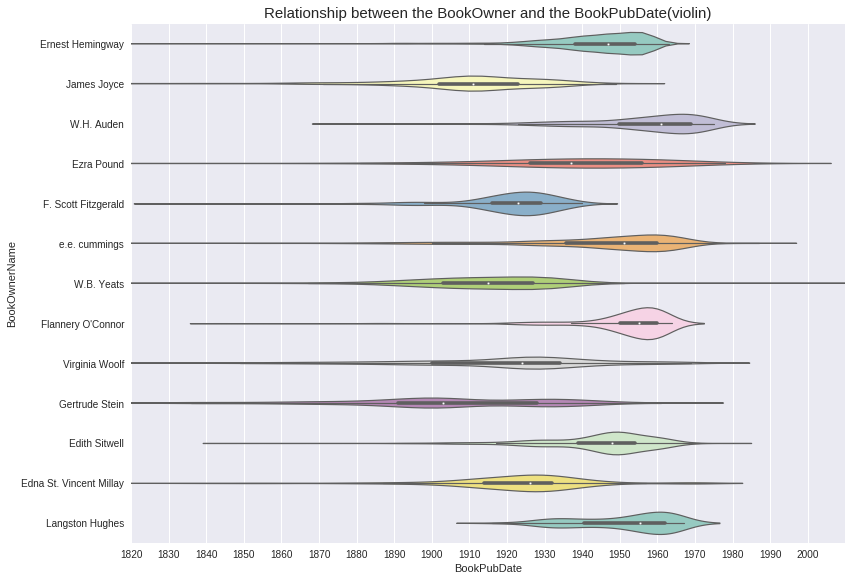

In [25]:
sns.factorplot(x='BookPubDate',y='BookOwnerName',data=cleaned_df,kind='violin', palette ='Set3',size=8,aspect=1.5,linewidth = 1.2,)
plt.xlim(1820,2010)
plt.xticks(np.arange(1820, 2010, 10))

plt.title('Relationship between the BookOwner and the BookPubDate(violin)',size=15)
plt.show()

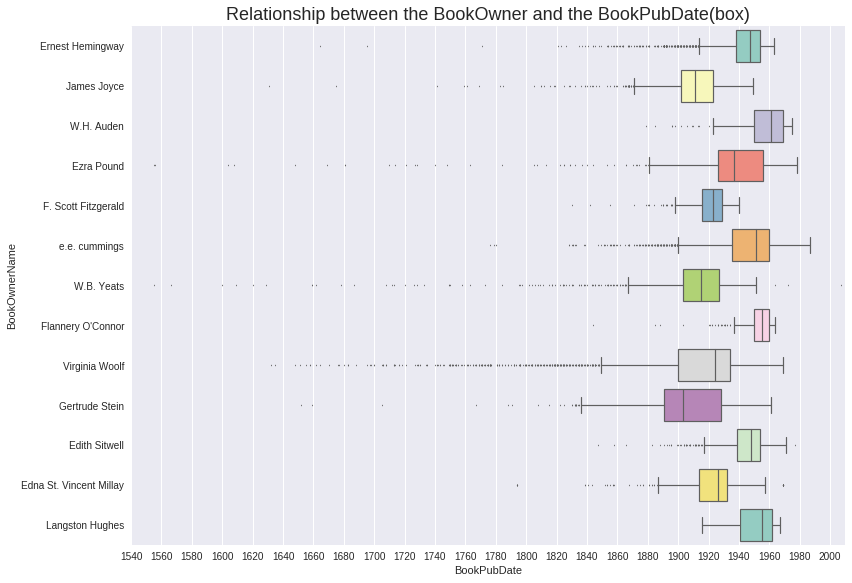

In [26]:
sns.factorplot(x='BookPubDate',y='BookOwnerName',data=cleaned_df,kind='box', 
               palette ='Set3',linewidth = 1.2,size=8,aspect=1.5,saturation=0.8,fliersize=1.4)
plt.xticks(np.arange(1540, 2010, 20))
plt.xlim(1540,2010)
plt.title('Relationship between the BookOwner and the BookPubDate(box)',size=18)
plt.show()

# Reflection

The summary of statistics shows the basic information about the dataset, such as how many bookowners and bookauthors are here, who owns the largest number of book, who’s book is the most popular, which is the biggest information source, and the range and average book publish year in this dataset.

As for other information in the data, I didn’t explore very deeply in the 'BookTitle', and just listed the top 10 book titles in the dataset, they were almost all poems, which could reflect the genre that liked by the book owners. I think this could be a good future point to start, which can be related to the genre. 

The visualizations of the data show some detailed information that worth exploring, such as the proportation of booknumbers in terms of each bookowners, the distribution of BookPubDate and the relationship between the BookOwner and the BookPubDate.

There is some missing and wrangling data in the dataset, especially in the important ‘BookPubDetails’ and ‘BookPubDate’ columns. I found it’s hard for me to clean it in a suitable way because as for the‘BookPubDate’ column, except for the format like ’1980’, which just consists of 4 digits, there are also some different formats which contain the month, day or even a range of the time, this time I chose to ignore them and just kept the 4-digit format, but I think there should be a better way of cleaning, which can be used to ignore the least amount of data. Also,same as the 'bookpubdetails'column, as for the location information in it , I just list the top 15 places and didn’t do the visualization about it, although I think the location is worth exploring, I didn’t find a good way to extract this information in the ‘BookPubDetails’ column. I think I will try to figure out a way to get the location information in the next assignment.

# Hypothesise

1) Although I just listed the top 15 locations in the bookpubdetails, we could check them to see if the book owners spent the most time living in these places or travelled a lot to these places. About the ways of testing this, I would ask our data owner to recommend some suitable website or books, which reflect this kind of information.

2) The most popular author W.B. Yeats is also the book owner, this information may reflect the relationship between W.B. Yeats and other book owners, maybe they were good friends or there were some stories between them. The ways of testing this is also check some official website and books.

3) From the bar chart above, we can see the average book publish year in terms of each book owner is significant, which means generally the book owners collected the books from different years. We know that the books from different years may have different styles and genres because of the non-stopping development in the field of literature. So, the distribution of bookpubdate may reflect the tastes of the book owners and we may find some similarities and differences between them. As for the testing, I will check the development of the literature, mainly find some information about the changing style and relate it to the time.
